#### 1)
$$G_0(j\omega)=\frac{k2}{0.001(jw)^2+0.11(jw)+1}$$

In [58]:
import numpy as np
import matplotlib.pyplot as plt

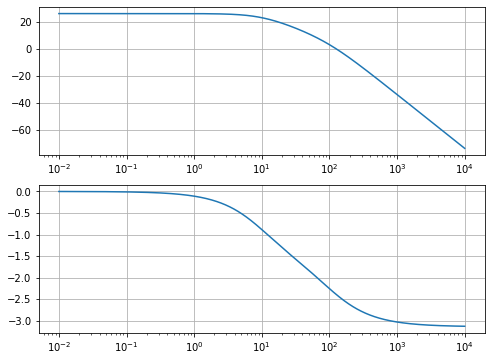

In [59]:
# data
k = 10
omega = np.logspace(-2, 4, 1000)
Gojw = k*2/(-0.001*omega**2+0.11*1j*omega+1)

# Bode-plot
K = np.abs(Gojw)
ph = np.angle(Gojw)

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20*np.log10(K))
plt.grid(True)
plt.subplot(2, 1, 2)
plt.semilogx(omega, ph)
plt.grid(True)


In [19]:
# At w = 200 rad/s
omega = 200
Gojw = 20/(-0.001*omega**2+0.11*1j*omega+1)
print(f"Value at w={omega} rad/s is {20*np.log10(np.abs(Gojw))}[dB]")

Value at w=200 rad/s is -7.000543856282388[dB]


#### 2)
Step response in time domain:
$$g(t)=k(1-e^{\frac{-(t-\tau)}{T_1}})$$

In [22]:
# data
k = 7.2 # gain
T_1 = 16 # time taken to reach 63% of k
tau = 2 # delay
t = np.linspace(0, 60, 100000)
v = k*(1-np.exp(-(t-tau)/T_1))*(t>tau)

K=7.2, T1=16, Tau=2


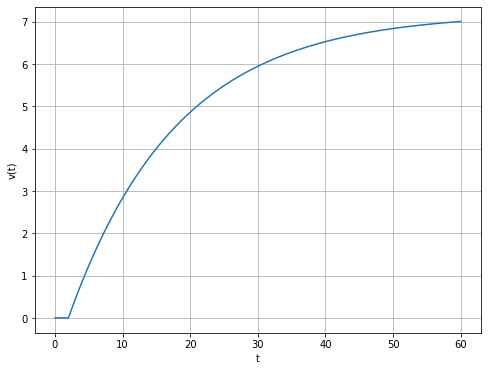

In [24]:
# Step response
plt.figure(figsize=(8, 6))
plt.plot(t, v)
plt.xlabel(r"t")
plt.ylabel(r"v(t)")
plt.grid(True)
print(f"K={k}, T1={T_1}, Tau={tau}")

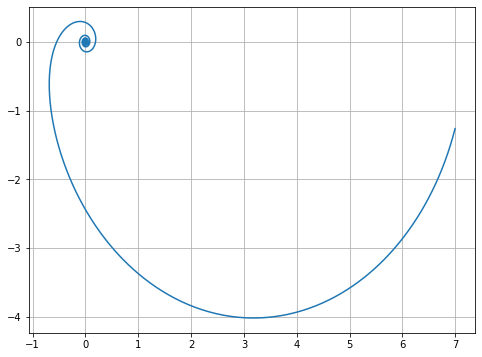

In [34]:
# Nyquist plot
# data
omega = np.logspace(-2, 3, 1000)
Gojw = k/(1+1j*omega*T_1)*np.exp(-tau*1j*omega)

# plot
plt.figure(figsize=(8, 6))
plt.plot(np.real(Gojw), np.imag(Gojw))
plt.grid(True)
# We can say that the system is stable.

#### 3)

In [51]:
# data
k = 0.9
T_1 = 3
tau = 1/6
r = 50
u_0 = 100
h = 1
t = np.linspace(0, 50)
Got = k*u_0*(1-np.exp(-(t-tau)/T_1))

# Formulae
dY_off = (k*u_0-(r+h))*(1-np.exp(-tau/T_1))
dY_on = (r-h)*(1-np.exp(-tau/T_1))
dY = 2*h+(k*u_0-2*h)*(1-np.exp(-tau/T_1))
T_on = (-T_1*np.log(1-dY/(k*u_0-(r-h-dY_on))))
T_off = (-T_1*np.log(1-dY/(r+h+dY_off)))
T_c = T_on + T_off
print(f"Tc is {T_c}")

Tc is 0.912617969676051


#### 5)
In closed loop:
$$ G(s) = \frac{C(s)P(s)}{1+C(s)P(s)}\,or\,G(s) = \frac{G_0(s)}{1+G_0(s)}$$

In [60]:
# data
k = 10
omega = np.logspace(-2, 4, 1000)
Gojw = k*2/(-0.001*omega**2+0.11*1j*omega+1)
Gojw_cl = Gojw/(1+Gojw)

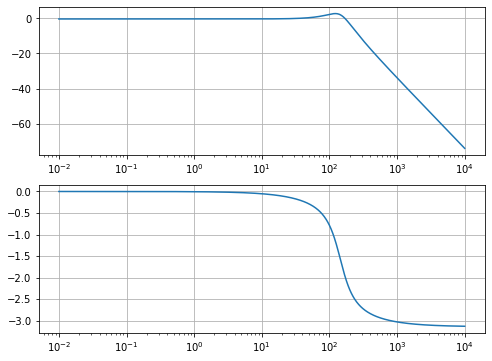

In [61]:
# Bode-plot
K = np.abs(Gojw_cl)
ph = np.angle(Gojw_cl)

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20*np.log10(K))
plt.grid(True)
plt.subplot(2, 1, 2)
plt.semilogx(omega, ph)
plt.grid(True)
# Difference to my opinion: because the system is closed loop(feedback based),
# by the aid of the reference tracking transfer function, our system is capable
# of getting error, after which it can react according to that. That's why steady
# state error in this case approaches to zero as we go along with the time.
# This is not the case with open loop system. Since there is no feedback, there is
# no way for the system to react in the manner closed loop does.

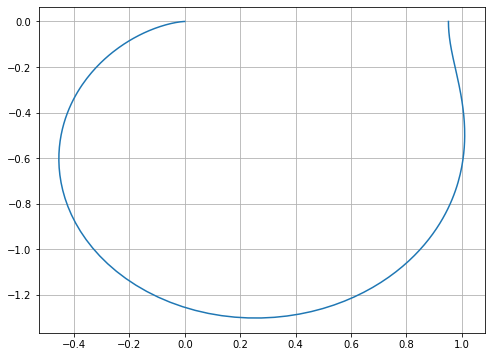

In [62]:
# Nyquist plot
plt.figure(figsize=(8, 6))
plt.plot(np.real(Gojw_cl), np.imag(Gojw_cl))
plt.grid(True)
# We can say that the system is stable.